### 数据分析-sklearn库练习-Boston房价预测

本次作业的任务是熟悉sklearn库各个模块的应用，为后续10大算法的学习和实战奠定基础。

In [58]:
#step one :导入数据
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score, KFold

# 1.1 读入指定的数据
data = pd.read_csv('data.csv')

# 1.2 查看数据的形状
print(data.shape)

#在这个项目中，你将使用我提供美国房屋信息数据来训练和测试一个模型，并对模型的性能和预测能力进行评估。我们希望可以通过该模型实现对房屋的价值预估，提高房地产经纪人的工作效率。

#此项目的数据集该数据集统计了美国个人住宅销售情况,文件名为data.csv

(4600, 18)


In [59]:
# step 2 :观测数据

# 2.1 随机查看数据5个样本
print(data.sample(5))
print("--------------------------------------------")

# 2.1 查看数据的统计特征
print(data.describe())

                date        price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4189   2014/7/9 0:00  692500.0000         4       2.75         3710      7984   
3479  2014/6/26 0:00  626000.0000         3       1.75         2430      5000   
4353   2014/5/5 0:00  117833.3333         3       1.00         1340    306848   
3218  2014/6/24 0:00  510000.0000         3       2.25         1420      1309   
1150  2014/5/22 0:00  926300.0000         3       1.50         1660      4800   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
4189     2.0           0     0          3        3710              0   
3479     2.0           0     0          4        1760            670   
4353     1.0           0     0          3        1340              0   
3218     3.0           0     0          3        1420              0   
1150     2.0           0     0          3        1660              0   

      yr_built  yr_renovated                     street        city  statezip  \

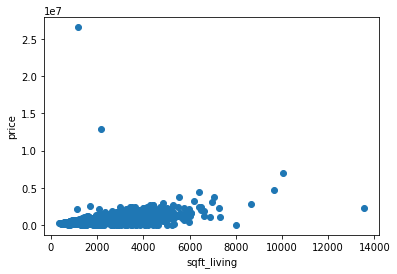

(4412, 18)
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [60]:
# step 3: 数据预处理
# 给你们的数据不可能是百分百的干净数据，在采集过程中存在“失误”、“冗余”的数据，这一步骤，要求大家从数据的正确性和完整性两个方面处理数据。
#正确性：要求数据中没有异常值。
#完整性：采集的数据可能存在缺失，可以采用丢弃数据和填补法完成缺失数据的缺失。

# 3.1 正确性处理：可以可视化的方法分析各个特征的异常值，然后去除异常值；
plt.scatter(data['sqft_living'], data['price'])
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

#删除pirce > 100000或者sqft_living > 4000的数据
index = data[(data['price'] > 100000) & (data['sqft_living'] > 4000)].index
data.drop(index=index, inplace=True)
print(data.shape)

# 3.2 完整性处理：去除重复的数据，采用你们认为最合适的方法处理缺失值
#删除重复行
data = data.drop_duplicates(ignore_index = True)

#查看缺失值
print(data.isnull().sum())
#已经不存在缺失值

In [61]:
# step4:特征处理

#特征是机器学习中最重要的部分，
#4.1 数据编码：对数据集中的非数字信息进行数字编码
print(data.city.unique())

unique_array = data.city.unique()
def map_function(x):
    return np.argwhere(x == unique_array)[0,0]
data.city = data.city.map(map_function)

#查看处理过后的数据
print(data.city.unique())

#4.2 分析数据是否存在冗余或者与任务不相关的特征，对特征进行降维
data = data.drop(['statezip', 'country', 'street', 'date'], axis = 1)

['Shoreline' 'Seattle' 'Kent' 'Bellevue' 'Redmond' 'Maple Valley'
 'North Bend' 'Lake Forest Park' 'Sammamish' 'Auburn' 'Des Moines'
 'Bothell' 'Federal Way' 'Kirkland' 'Issaquah' 'Woodinville'
 'Normandy Park' 'Fall City' 'Renton' 'Carnation' 'Snoqualmie' 'Duvall'
 'Burien' 'Covington' 'Inglewood-Finn Hill' 'Kenmore' 'Newcastle'
 'Black Diamond' 'Ravensdale' 'Clyde Hill' 'Algona' 'Mercer Island'
 'Skykomish' 'Tukwila' 'Vashon' 'Yarrow Point' 'SeaTac' 'Medina'
 'Enumclaw' 'Snoqualmie Pass' 'Pacific' 'Beaux Arts Village' 'Preston'
 'Milton']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


-0.015417586107882686


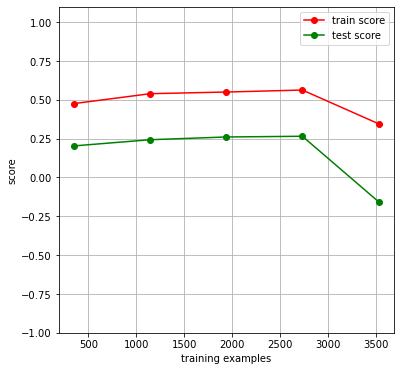

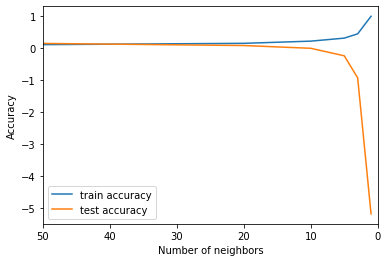

In [62]:
# step5 模型选择

# 本次任务是完成房价的预测，属于回归问题

#4.1 请在回归模块中选择合适的模块，对模型进行拟合和预测
#数据集划分
y = data['price']
x = data.drop(['price'], axis=1)
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=666)

#标准化处理
standardscaler = StandardScaler()
standardscaler.fit(x_train)
X_train_std = standardscaler.transform(x_train)
X_test_std = standardscaler.transform(x_test)

#训练
kNN_reg = KNeighborsRegressor()
kNN_reg.fit(X_train_std, y_train)

#4.2 评估模型的性能
print(kNN_reg.score(x_test,y_test))

#4.3 画出模型的学习曲线和验证曲线
title = '学习曲线'
train_sizes,train_scores,test_scores=learning_curve(KNeighborsRegressor(), x, y)

# 设置画布和子图
fig,ax=plt.subplots(1,1,figsize=(6,6))

# 设置子图坐标
ax.set_ylim((-1,1.1))
ax.set_xlabel("training examples")
ax.set_ylabel("score")

# 画出网图
ax.grid() 
ax.plot(train_sizes,np.mean(train_scores,axis=1),'o-',color='r',label='train score')

# 画训练集数据分数，横坐标为用作训练的样本数，纵坐标为不同折下的训练分数的均值
ax.plot(train_sizes,np.mean(test_scores,axis=1),'o-',color='g',label='test score')
ax.legend(loc='best')
plt.show()

#4.4 选定的模型是否存在超参数，给出一个范围，给处范围内最好的选择，并给出评价分数
n_neighbors = [1, 3, 5, 10, 20, 50]

cv = KFold(shuffle=True)
train_scores, test_scores = validation_curve(KNeighborsRegressor(), x, y, param_name="n_neighbors",
                                             param_range=n_neighbors, cv=cv)
plt.plot(n_neighbors, train_scores.mean(axis=1), label="train accuracy")
plt.plot(n_neighbors, test_scores.mean(axis=1), label="test accuracy")
 
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.xlim([50, 0])
plt.legend(loc="best")
plt.show()